In [1]:
from sklearn.metrics import confusion_matrix
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [43]:
file1_path = "/mnt/data05/shared/pdutta_data/DNABERT_data/ft/1100BP_Prom_5:1/2021-12-29_13:04:33_result/pred_results.npy"

In [44]:
pred_torch= torch.from_numpy(np.load(file1_path))

In [45]:
pred_torch

tensor([0.0164, 0.0043, 0.9955,  ..., 0.1429, 0.0332, 0.0052])

In [46]:
t = torch.Tensor([0.5])

In [47]:
pred_out = (pred_torch > t).float() * 1

In [48]:
pred_out

tensor([0., 0., 1.,  ..., 0., 0., 0.])

In [49]:
pred_out.shape

torch.Size([40107])

In [50]:
pred_out.numpy()

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [51]:
dev_tsv = pd.read_csv("/mnt/data05/shared/pdutta_data/DNABERT_data/Promoter_prediction/1100BP_promoter_prediction_data/5:1/dev.tsv",sep= "\t")

In [52]:
dev_tsv.groupby(['label']).size()

label
0    33809
1     6298
dtype: int64

In [53]:
actual_pred = dev_tsv['label'].to_numpy()

In [54]:
actual_pred

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
cf_matrix = confusion_matrix(actual_pred, pred_out.numpy())

In [56]:
cf_matrix

array([[32330,  1479],
       [ 2258,  4040]])

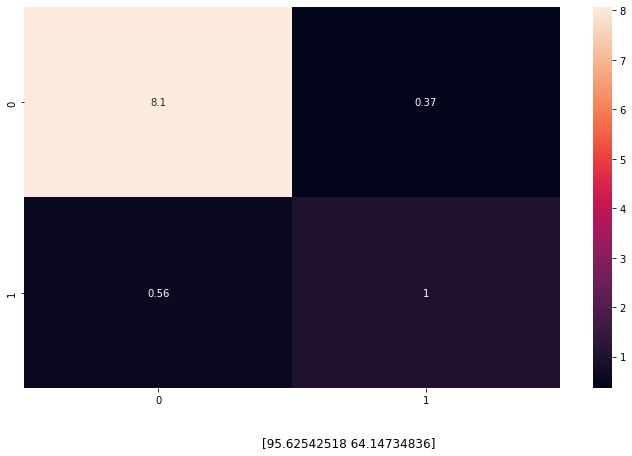

In [57]:
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in range(2)],
                     columns = [i for i in range(2)])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
class_accuracy=str(100*cf_matrix.diagonal()/cf_matrix.sum(1))
plt.figtext(0.5, 0.01, class_accuracy, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('output_1100bp_5:1.png')

In [37]:
class_accuracy=100*cf_matrix.diagonal()/cf_matrix.sum(1)
print(class_accuracy)

[95.08318799 58.21698113]
